#### Analysis of Extracted Answers from Video Data

This notebook performs exploratory data analysis (EDA) on the `Combined_Extracted_Answers.csv` dataset. The dataset contains question responses extracted from videos, where each row corresponds to a frame from a specific video and the columns contain answers to the questions.

In [16]:
## Import Libraries 
import pandas as pd
import numpy as np

#### Load Data into a pandas DataFrame

In [23]:
data = pd.read_csv('data/combined-df.csv')
data

,video_id,frame,What limb is injured?,Is the patient intubated?,Where is the catheter inserted?,Is there bleeding?,Has the bleeding stopped?,Is the patient moving?,Is the patient breathing?,Is there a tourniquet?,Is there a chest tube?,Are the patient and instruments secured?,If a limb is missing which one?,Is there mechanical ventilation?,What is the position of the injury?
0,ND27,0,no limb is injured,can't identify,no catheter is used,no,there is no bleeding,can't identify,can't identify,no,no,no,none,can't identify,thorax
1,ND27,1,no limb is injured,can't identify,no catheter is used,no,there is no bleeding,can't identify,can't identify,no,no,NaN,none,can't identify,thorax
2,ND27,2,no limb is injured,can't identify,no catheter is used,no,there is no bleeding,can't identify,can't identify,no,no,NaN,none,can't identify,thorax
3,ND27,3,no limb is injured,can't identify,no catheter is used,no,there is no bleeding,can't identify,can't identify,no,no,NaN,none,can't identify,thorax
4,ND27,4,no limb is injured,can't identify,no catheter is used,no,there is no bleeding,can't identify,can't identify,no,no,NaN,none,can't identify,thorax
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380398,IO34,1810,left leg,NaN,NaN,no,there is no bleeding,can't identify,can't identify,no,no,yes,none,NaN,lower limb
380399,IO34,1811,left leg,NaN,NaN,no,there is no bleeding,can't identify,can't identify,no,no,yes,none,NaN,lower limb
380400,IO34,1812,left leg,NaN,NaN,no,there is no bleeding,can't identify,can't identify,no,no,yes,none,NaN,lower limb
380401,IO34,1813,left leg,NaN,NaN,no,there is no bleeding,can't identify,can't identify,no,no,yes,none,NaN,lower limb


#### Examine Data Types

To understand the structure of the dataset and the type of data we’re dealing with.

In [24]:
data.dtypes

video_id                                    object
frame                                        int64
What limb is injured?                       object
Is the patient intubated?                   object
Where is the catheter inserted?             object
Is there bleeding?                          object
Has the bleeding stopped?                   object
Is the patient moving?                      object
Is the patient breathing?                   object
Is there a tourniquet?                      object
Is there a chest tube?                      object
Are the patient and instruments secured?    object
If a limb is missing which one?             object
Is there mechanical ventilation?            object
What is the position of the injury?         object
dtype: object

#### Query specific frames from the video with video_id == "Cric6" to inspect certain examples manually.

In [25]:
data[(data["frame"].isin([1958, 36, 771, 872])) & (data["video_id"] == "Cric6")]

,video_id,frame,What limb is injured?,Is the patient intubated?,Where is the catheter inserted?,Is there bleeding?,Has the bleeding stopped?,Is the patient moving?,Is the patient breathing?,Is there a tourniquet?,Is there a chest tube?,Are the patient and instruments secured?,If a limb is missing which one?,Is there mechanical ventilation?,What is the position of the injury?
178996,Cric6,36,no limb is injured,NaN,no catheter is used,no,there is no bleeding,can't identify,can't identify,no,no,yes,none,no,throat
179731,Cric6,771,no limb is injured,NaN,no catheter is used,no,there is no bleeding,can't identify,can't identify,no,no,yes,none,no,throat
179832,Cric6,872,no limb is injured,can't identify,no catheter is used,no,there is no bleeding,can't identify,can't identify,no,no,yes,none,NaN,throat
180918,Cric6,1958,no limb is injured,can't identify,no catheter is used,no,there is no bleeding,can't identify,can't identify,no,no,yes,none,yes,throat


#### Extract Possible Answers Per Question
Iterate through each question column to collect unique, non-null answers

In [26]:
possible_answers = []

for col in data.columns[2:]:
    values = data[col].dropna().unique().tolist()
    possible_answers.append(values)

possible_answers

[[' no limb is injured', ' left leg', ' left arm', ' right leg', 'right arm'],
 ["can't identify", 'no', 'yes'],
 ['no catheter is used', 'lower limb'],
 ['no', 'yes'],
 ['there is no bleeding', 'no', 'yes'],
 ["can't identify", 'yes', 'no'],
 ["can't identify", 'no', 'yes'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['no', 'yes', "can't identify"],
 ['none', 'left arm', 'left leg', 'right leg'],
 ["can't identify", 'no', 'yes'],
 ['thorax', 'throat', "can't identify", 'lower limb', 'abdomen', 'upper limb']]

#### Count Unique Answers for Each Question

In [27]:
for i in data.columns[2:]:
    print(data[i].nunique())

5
3
2
2
3
3
3
2
2
3
4
3
6


#### Visualize Unique Answer Counts Per Question
Using a bar chart, we visualize the number of unique answers for each question to identify questions with a high variety of responses.

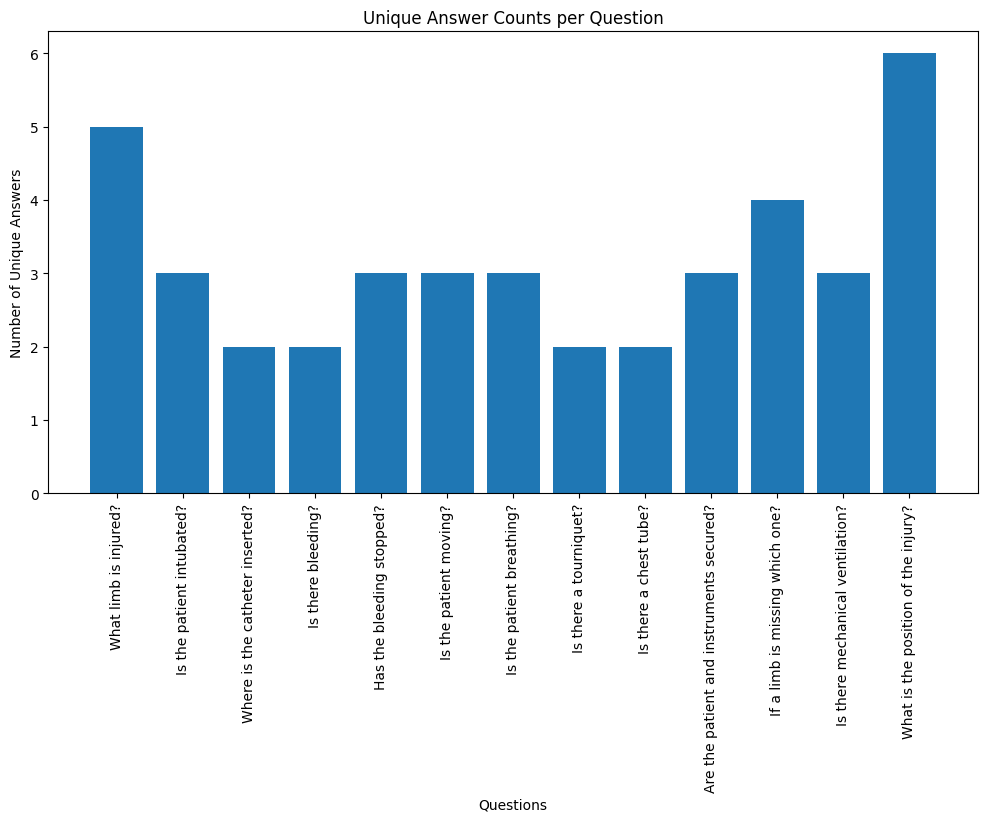

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract the relevant columns (assuming first two columns are metadata)
question_columns = data.columns[2:]

# Compute the number of unique answers for each question
unique_counts = {col: data[col].nunique() for col in question_columns}

# Plot the number of unique answers per question
plt.figure(figsize=(12, 6))
plt.bar(unique_counts.keys(), unique_counts.values())
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.xlabel("Questions")
plt.ylabel("Number of Unique Answers")
plt.title("Unique Answer Counts per Question")
plt.show()



#### Visualize Unique Answer Distributions
We create a grouped bar chart to visualize how often each unique answer occurs across different questions.

/var/folders/0g/5jl4b1d12lvc6g70prn2_rnr0000gn/T/ipykernel_31202/1438506293.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=vc.index, x=vc.values, ax=ax, palette="rocket")
/var/folders/0g/5jl4b1d12lvc6g70prn2_rnr0000gn/T/ipykernel_31202/1438506293.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=vc.index, x=vc.values, ax=ax, palette="rocket")
/var/folders/0g/5jl4b1d12lvc6g70prn2_rnr0000gn/T/ipykernel_31202/1438506293.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=vc.index, x=vc.values, ax=ax, palette="rocket")
/var/folde

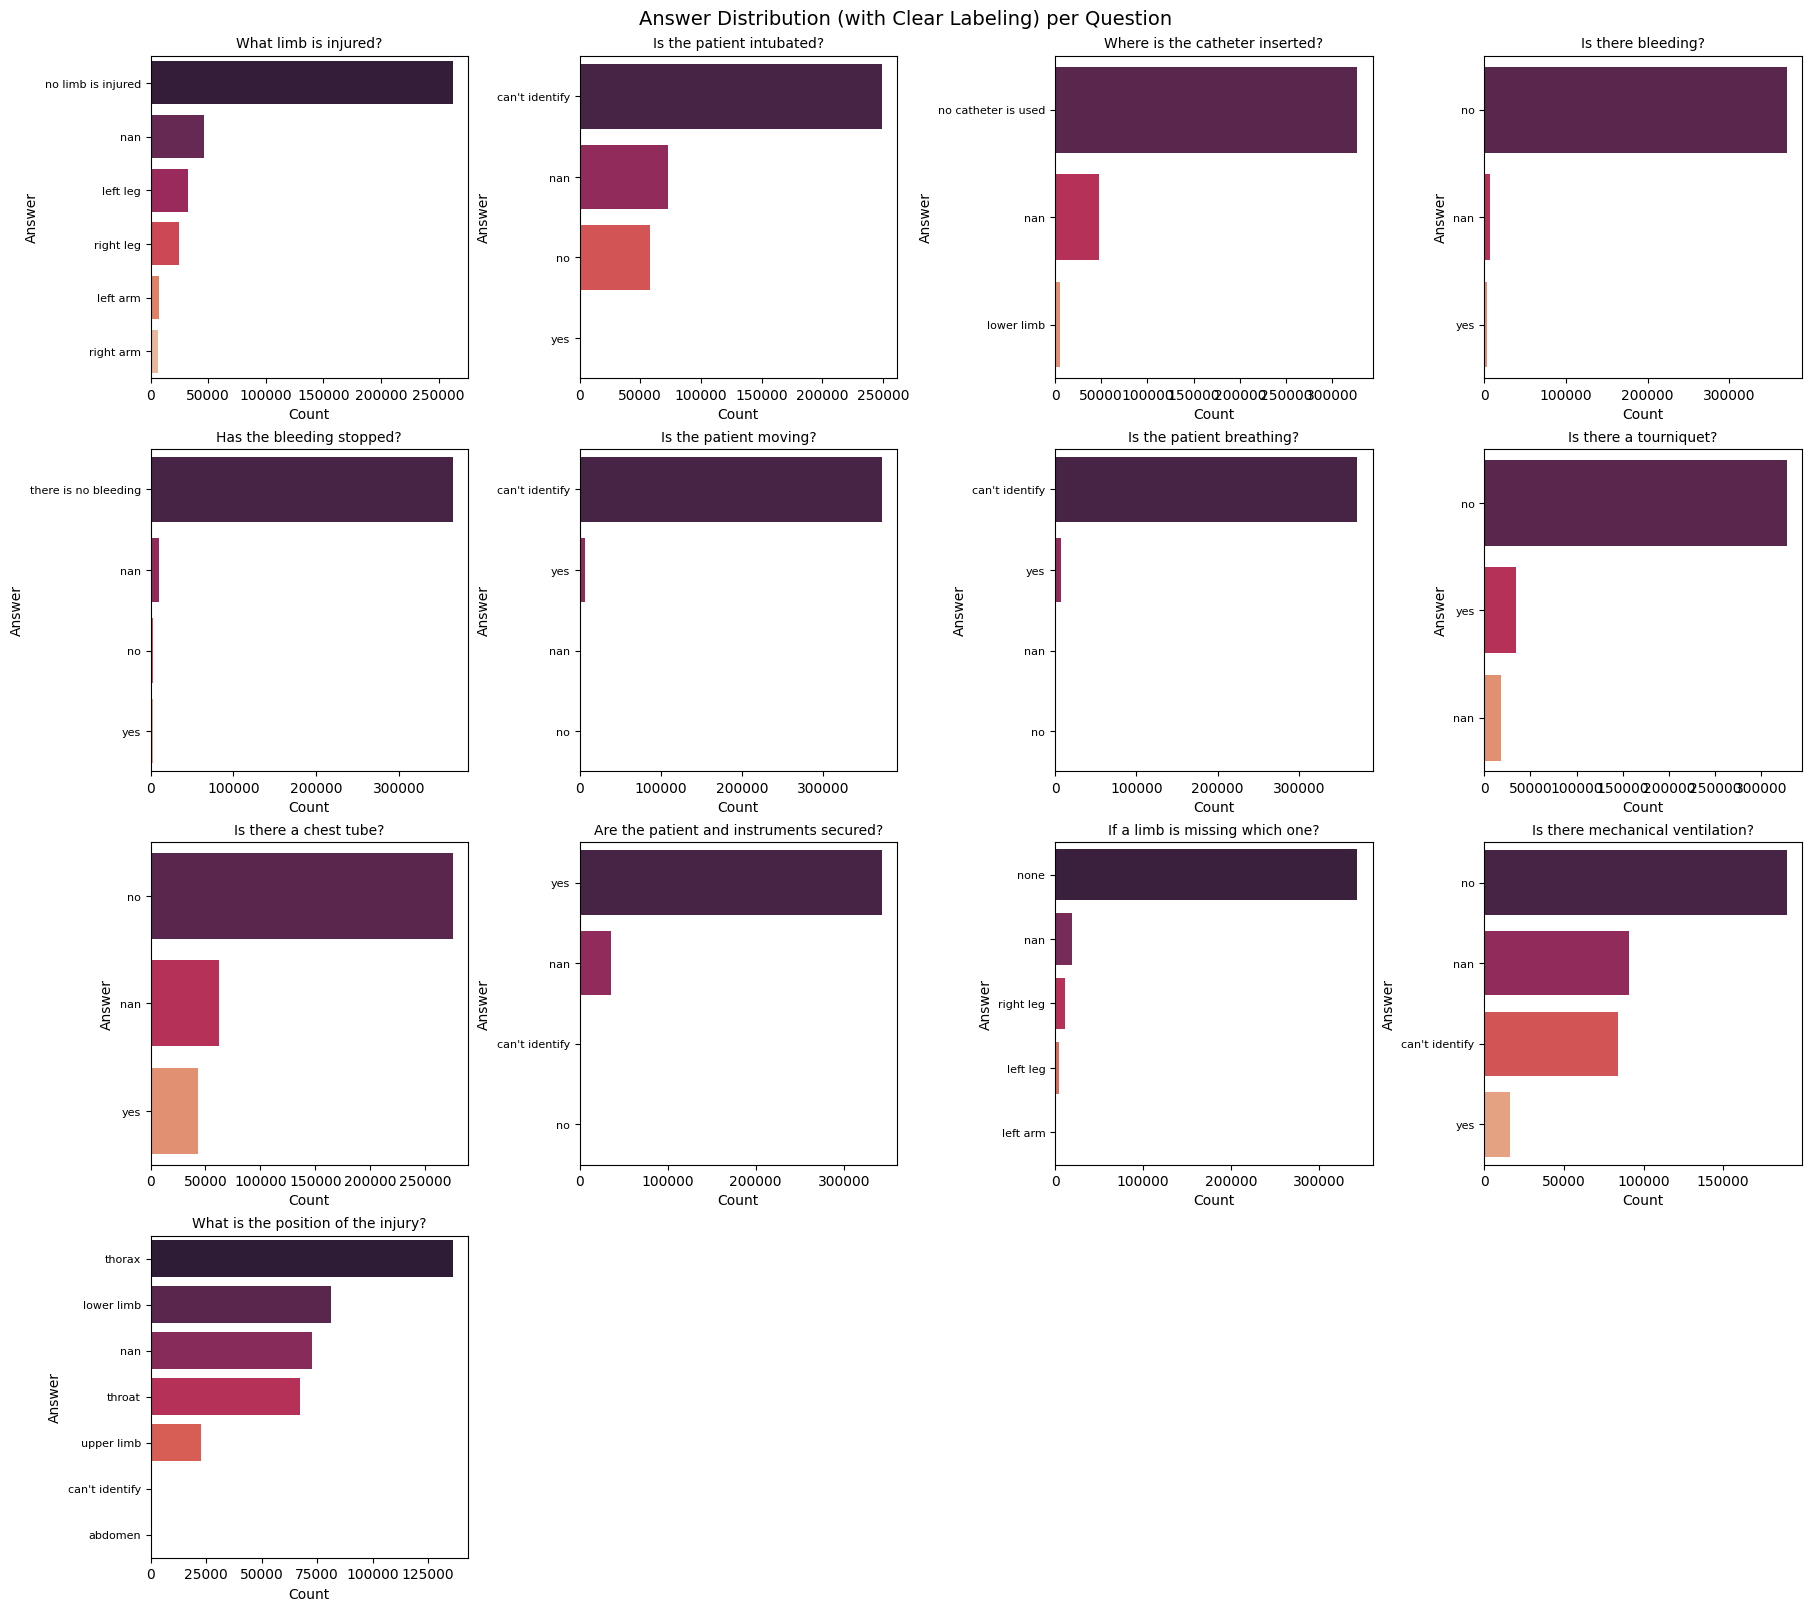

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Normalize answers for better grouping
clean_data = data.copy()
for col in question_columns:
    clean_data[col] = clean_data[col].astype(str).str.strip().str.lower()

# Set up subplots
n_cols = 4
n_rows = (len(question_columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows), constrained_layout=True)

for idx, col in enumerate(question_columns):
    ax = axes[idx // n_cols, idx % n_cols]
    
    # Value counts of unique answers
    vc = clean_data[col].value_counts().sort_values(ascending=False)
    
    # Plot bar chart
    sns.barplot(y=vc.index, x=vc.values, ax=ax, palette="rocket")
    
    ax.set_title(col, fontsize=10)
    ax.set_xlabel("Count")
    ax.set_ylabel("Answer")
    ax.tick_params(axis='y', labelsize=8)

# Hide any unused subplots
for j in range(len(question_columns), n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.suptitle("Answer Distribution (with Clear Labeling) per Question", fontsize=14)
plt.show()


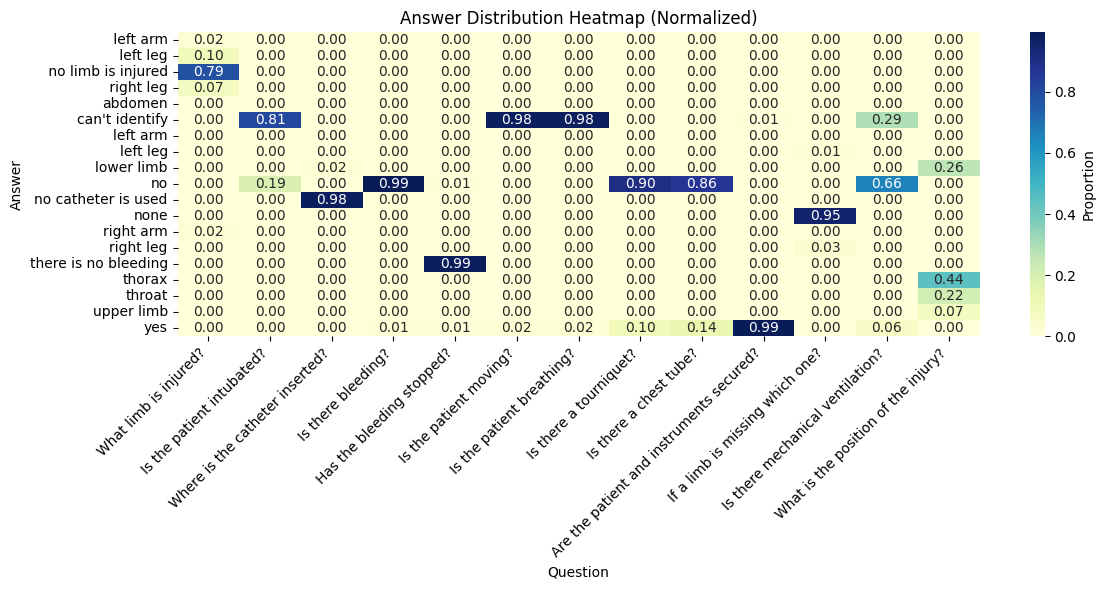

In [41]:
# Get normalized value counts (percentages) per question
answer_dist = pd.DataFrame({
    col: data[col].value_counts(normalize=True)
    for col in question_columns
}).fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(answer_dist, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Proportion'})
plt.title("Answer Distribution Heatmap (Normalized)")
plt.xlabel("Question")
plt.ylabel("Answer")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
